In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import seaborn as sns
from tqdm import tqdm
from datetime import timedelta
import plotly
import plotly.express as px
pd.options.display.max_columns = 999


## Customers

In [13]:
%%time
customers = pd.read_csv('customer.csv')

CPU times: total: 203 ms
Wall time: 349 ms


In [146]:
customers.groupby('first_join_date')['customer_id'].nunique()

first_join_date
2016-06-30      6
2016-07-01     10
2016-07-02     35
2016-07-03     36
2016-07-04     15
             ... 
2022-07-27     34
2022-07-28     24
2022-07-29     25
2022-07-30    152
2022-07-31    171
Name: customer_id, Length: 2223, dtype: int64

In [14]:
# 날짜 데이터를 datetime으로 변경
# 생각해보니 여기 데이터 22년이 마지막이라서 22년을 기준으로 나이를 집계해야하는구나?
customers= customers.assign(birthdate = pd.to_datetime(customers.birthdate))
customers= customers.assign(age = (2022- customers.birthdate.dt.year))

In [15]:
# 서비스를 이용하는 성별 비중은 여자 64%, 남자 35%
customers.gender.value_counts(normalize=True)
# 평균 나이는 26.5세
customers.age.mean()
# 남 여 모두 평균 나이는 26세
customers.groupby('gender')['age'].mean()

gender
F    26.479355
M    26.582164
Name: age, dtype: float64

In [143]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

## Click_stream_new

In [16]:
%%time
click_stream_new = pd.read_csv('click_stream_new.csv')
click_stream_new.head()

CPU times: total: 14.8 s
Wall time: 22.1 s


,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [17]:
click_stream_new.isna().sum()

session_id                0
event_name                0
event_time                0
event_id                  0
traffic_source            0
product_id         10896445
quantity           10896445
item_price         10896445
payment_status     11981020
search_keywords    11660336
promo_code         12507067
promo_amount       12507067
dtype: int64

In [18]:
# # 라벨 인코딩 X 용량 줄이기
# click_stream_new =click_stream_new.assign(event_time =pd.to_datetime(click_stream_new['event_time']))
# click_stream_new['product_id'] = click_stream_new['product_id'].astype('float32')
# click_stream_new['item_price'] = click_stream_new['item_price'].astype('float32')
# click_stream_new['quantity'] = click_stream_new['quantity'].astype('float32')
# click_stream_new['traffic_source'] = click_stream_new['traffic_source'].astype('category')
# click_stream_new['payment_status'] = click_stream_new['payment_status'].astype('category')
# # click_stream_new = click_stream_new.drop('event_id',axis=1)
# click_stream_new.info()

#### Label Encoding으로 용량 줄이기

In [19]:
# 라벨 인코딩으로  용량 줄이기
from sklearn.preprocessing import LabelEncoder

label_col =['payment_status','traffic_source','event_name']

le1 = LabelEncoder()
le2= LabelEncoder()
le3 = LabelEncoder()


click_stream_new['payment_status'].loc[~(click_stream_new['payment_status'].isnull())] = le1.fit_transform(click_stream_new['payment_status'].loc[~(click_stream_new['payment_status'].isnull())])
click_stream_new['traffic_source'] = le2.fit_transform(click_stream_new['traffic_source'])
click_stream_new['event_name'] = le3.fit_transform(click_stream_new['event_name'])


click_stream_new = click_stream_new.assign(event_time=pd.to_datetime(click_stream_new['event_time']) + timedelta(hours=7))
click_stream_new['product_id'] = click_stream_new['product_id'].astype('float32')
click_stream_new['item_price'] = click_stream_new['item_price'].astype('float32')
click_stream_new['quantity'] = click_stream_new['quantity'].astype('float32')
click_stream_new['promo_amount'] = click_stream_new['promo_amount'].astype('float32')
click_stream_new = click_stream_new.drop('event_id',axis=1)

click_stream_new['traffic_source'] = click_stream_new['traffic_source'].astype('int8')
click_stream_new['event_name'] = click_stream_new['event_name'].astype('int8')
click_stream_new.info()


print(le1.classes_)
print(le2.classes_)
print(le3.classes_)

C:\Users\kwon8\AppData\Local\Temp\ipykernel_5184\4235669192.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_stream_new['payment_status'].loc[~(click_stream_new['payment_status'].isnull())] = le1.fit_transform(click_stream_new['payment_status'].loc[~(click_stream_new['payment_status'].isnull())])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 11 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       int8               
 2   event_time       datetime64[ns, UTC]
 3   traffic_source   int8               
 4   product_id       float32            
 5   quantity         float32            
 6   item_price       float32            
 7   payment_status   object             
 8   search_keywords  object             
 9   promo_code       object             
 10  promo_amount     float32            
dtypes: datetime64[ns, UTC](1), float32(4), int8(2), object(4)
memory usage: 709.9+ MB
['Failed' 'Success']
['MOBILE' 'WEB']
['ADD_PROMO' 'ADD_TO_CART' 'BOOKING' 'CLICK' 'HOMEPAGE' 'ITEM_DETAIL'
 'PROMO_PAGE' 'SCROLL' 'SEARCH']


## 퍼널

**퍼널분석**을 위한 각 session_id별 구간에 따른 비율 비교
- 머리로는 HOMEPAGE  -> click -> SCROLL ->add_to_cart -> booking이 맞지 않을까 하는데  add_cart/booking이 비율이 상당히 높음

In [20]:
event_name_index_list = click_stream_new.event_name.value_counts().sort_index().index.to_list()
session_cnt = click_stream_new['session_id'].nunique()
cpy_idx = event_name_index_list.copy()
cpy_idx.remove(0)
cpy_idx.remove(6)
cpy_idx.remove(5)
cpy_idx.remove(8)

In [23]:
# 전체 event_name에 따른 퍼널 분석?
for num in (event_name_index_list ):
    event_session_cnt = click_stream_new[click_stream_new.event_name == num]['session_id'].nunique()
    event_session_percentage = event_session_cnt / session_cnt
    print(f'{le3.classes_[num]} : {event_session_percentage:.3f}')

ADD_PROMO : 0.365
ADD_TO_CART : 0.974
BOOKING : 0.952
CLICK : 0.750
HOMEPAGE : 1.000
ITEM_DETAIL : 0.582
PROMO_PAGE : 0.392
SCROLL : 0.640
SEARCH : 0.548


In [24]:
# 원하는 퍼널만 보기 
import operator  # dict에서 정렬을 위한 라이브러리
temp_dict={}
for num in (cpy_idx ):
    event_session_cnt = click_stream_new[click_stream_new.event_name == num]['session_id'].nunique()
    event_session_percentage = event_session_cnt / session_cnt
    event_name = le3.classes_[num]
    temp_dict[event_name] = round(event_session_percentage, 3)
    # print(f'{le3.classes_[num]} : {event_session_percentage:.3f}')

temp_dict = sorted(temp_dict.items(), key=operator.itemgetter(1),reverse=True)
funnel_df = pd.DataFrame(temp_dict, columns=['Event', 'Percentage'])
funnel_df

,Event,Percentage
0,HOMEPAGE,1.000
1,ADD_TO_CART,0.974
2,BOOKING,0.952
3,CLICK,0.750
4,SCROLL,0.640


In [28]:
fig = px.funnel(funnel_df, y='Event', x='Percentage', width=800, height=400)
fig.show()

In [29]:
click_stream_new[click_stream_new.session_id == '7d440441-e67a-4d36-b324-80ffd636d166'].sort_values('event_time')

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
2,7d440441-e67a-4d36-b324-80ffd636d166,4,2019-09-01 19:05:10.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,1,2019-09-01 19:06:33.322763+00:00,0,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
5,7d440441-e67a-4d36-b324-80ffd636d166,8,2019-09-01 19:07:00.322763+00:00,0,NaN,NaN,NaN,NaN,Dress Kondangan,NaN,NaN
6,7d440441-e67a-4d36-b324-80ffd636d166,4,2019-09-01 19:08:27.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7d440441-e67a-4d36-b324-80ffd636d166,5,2019-09-01 19:09:49.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7d440441-e67a-4d36-b324-80ffd636d166,7,2019-09-01 19:11:06.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7d440441-e67a-4d36-b324-80ffd636d166,5,2019-09-01 19:12:19.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,7d440441-e67a-4d36-b324-80ffd636d166,5,2019-09-01 19:13:36.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,2,2019-09-01 19:15:29.425431+00:00,0,NaN,NaN,NaN,1,NaN,NaN,NaN


In [30]:
click_stream_new[click_stream_new.session_id == '7d440441-e67a-4d36-b324-80ffd636d166'].sort_values('event_time')

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
2,7d440441-e67a-4d36-b324-80ffd636d166,4,2019-09-01 19:05:10.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,1,2019-09-01 19:06:33.322763+00:00,0,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
5,7d440441-e67a-4d36-b324-80ffd636d166,8,2019-09-01 19:07:00.322763+00:00,0,NaN,NaN,NaN,NaN,Dress Kondangan,NaN,NaN
6,7d440441-e67a-4d36-b324-80ffd636d166,4,2019-09-01 19:08:27.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7d440441-e67a-4d36-b324-80ffd636d166,5,2019-09-01 19:09:49.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7d440441-e67a-4d36-b324-80ffd636d166,7,2019-09-01 19:11:06.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7d440441-e67a-4d36-b324-80ffd636d166,5,2019-09-01 19:12:19.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,7d440441-e67a-4d36-b324-80ffd636d166,5,2019-09-01 19:13:36.322763+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,2,2019-09-01 19:15:29.425431+00:00,0,NaN,NaN,NaN,1,NaN,NaN,NaN


In [ ]:
# temp.to_csv('click_stream_light.csv',index=False)

## Product

In [31]:
products = pd.read_csv('product.csv', on_bad_lines='skip')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [32]:
products.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [33]:
products.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [34]:
products.usage.value_counts()

usage
Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: count, dtype: int64

In [35]:
products.masterCategory.value_counts()

masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

## Transaction_new

In [36]:
transaction_new = pd.read_csv('transaction_new.csv')
transaction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [37]:
transaction_new.isna().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

In [138]:
transaction_new.customer_id.nunique()

50705

## merge click_stream + product

In [39]:
click_stream_new_products = click_stream_new.merge(products, how='left' , left_on='product_id', right_on='id')

In [116]:
click_stream_new_products = click_stream_new_products.drop('id',axis =1)

## Transaction + Customers = cus_transaction

In [118]:
cus_transaction = transaction_new.merge(customers, how='inner', on ='customer_id')
cus_transaction.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2018-07-29,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,22
1,2018-07-30,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
2,2018-09-15,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
3,2018-11-01,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
4,2018-12-18,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26


In [227]:
# 결제를 한 사람들의 나이도 26살~
cus_transaction[cus_transaction.payment_status == 'Success']['age'].mean()

# 결제를 한 사람들의 남 여 비중도 customers의 남여 비중과 차이 나지 않음.  여자 63, 남자 36퍼~
cus_transaction[cus_transaction.payment_status == 'Success']['gender'].value_counts(normalize=True)

gender
F    0.637819
M    0.362181
Name: proportion, dtype: float64

<Axes: xlabel='age', ylabel='gender'>

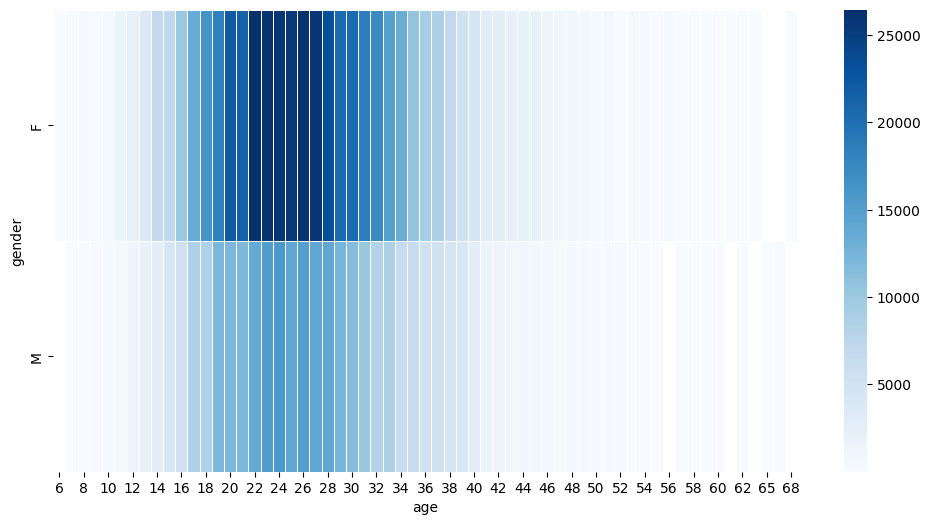

In [122]:
# 구매를 한 사람들 중에서 프로모션의 참여 여부에 따른 나이,성별의 차이는 없당~ 
success_df= cus_transaction[cus_transaction.payment_status == 'Success']
heatmap_data= success_df[success_df['promo_code'].isnull()].groupby('age')['gender'].value_counts().to_frame().reset_index().pivot(index='gender',columns='age',values='count')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,linewidths=0.5 , cmap='Blues')

In [123]:
# 구매를 한 사람들은 credit Card가 35퍼 , gopay가 20퍼 ovo가 19퍼, debit Card가 16퍼로 나름 균등하게 나옴.
# 구매를 한 사람들중에 프로모션을 참여한 사람들의 지불 방법에도 큰 차이가 없다.
 
success_df.payment_method.value_counts(normalize=True)*100
success_df[~success_df['promo_code'].isnull()].payment_method.value_counts(normalize=True)*100

payment_method
Credit Card    34.939725
Gopay          20.055275
OVO            19.911448
Debit Card     16.160886
LinkAja         8.932666
Name: proportion, dtype: float64

In [124]:
success_df[~success_df['promo_code'].isnull() ] 

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2018-07-29,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,22
5,2019-02-03,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.602334,120.363824,181865,59620,1,183234,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
8,2019-06-24,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,-6.126016,106.779552,370757,12282,1,364776,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
9,2019-08-10,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,53051,1,292052,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
10,2019-08-10,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,46352,1,241945,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254575,2022-07-07,99675,1849df71-943e-431d-8731-35b75670203a,0aa7c9aa-517e-4c79-b691-137861f4e9af,Credit Card,Success,3388,XX2022,0,2022-07-12T23:34:17.670587Z,-8.093308,110.709094,485334,35318,1,488722,Laila,Pudjiastuti,b12282d0-f890-41b3-977e-43a7f89b95c1,b12282d0_f890_41b3_977e_43a7f89b95c1@startupca...,F,1991-08-17,iOS,9355cb0c-f300-42ce-a9d3-8a65b2f957a7,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,-8.093308,110.709094,Yogyakarta,Indonesia,2022-05-06,31
1254581,2021-12-09,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213,Salwa,Prastuti,46d47eaa-4d8a-4f17-b083-48c2ad4fe947,46d47eaa_4d8a_4f17_b083_48c2ad4fe947@zakyfound...,F,2006-04-21,Android,582053d8-d444-427b-9e9a-e12bbc54b1d8,Android 2.3,-2.266407,120.415779,Sulawesi Selatan,Indonesia,2021-12-08,16
1254582,2021-12-11,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835,Tania,Palastri,f09d115a-a950-451e-9c4f-de117a2657f4,f09d115a_a950_451e_9c4f_de117a2657f4@zakyfound...,F,1991-03-17,Android,91acc617-e277-463c-8132-7fd0196520a7,An

In [125]:
# 다양한 지불 방법을 한 사람이 사용함.
# 프로모션에 따라서 결제 방법이 다른가 싶었지만 그건 아니였다.
# 프로모션에 따라서 할인 되는 금액이 다른데 그 기준을 아직 모르겠음 
# 뭐이리 많이 구매했을까 이 사람은... 
success_df[(~success_df['promo_code'].isnull() )& (success_df['customer_id'] == 4774)].sort_values('created_at').drop_duplicates('created_at')

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
5,2019-02-03,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.602334,120.363824,181865,59620,1,183234,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
8,2019-06-24,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,-6.126016,106.779552,370757,12282,1,364776,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
9,2019-08-10,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,53051,1,292052,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
17,2019-12-29,4774,01e4aedf-c297-4404-992a-1c9756f19ad9,7a134594-54ed-447a-a87d-a67bea47e109,Credit Card,Success,6208,LIBURDONG,10000,2020-01-03T04:09:43.221514Z,-7.118592,113.312235,249616,25734,1,245824,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
24,2020-04-01,4774,b60b524e-f624-41d1-8984-febfd5d0097e,42e91872-d1d5-44a5-925f-8532cee92d37,Credit Card,Success,5911,AZ2022,5000,2020-04-07T01:10:52.225190Z,-3.602334,120.363824,464824,41455,1,139673,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
32,2021-02-24,4774,3e8d1505-80ad-4438-a82b-2a017e0c551e,57b6d108-9ec4-48ef-8d66-cdd17c4942ba,Gopay,Success,3855,BUYMORE,10000,2021-02-28T20:19:37.594671Z,-7.341194,106.593658,213809,11599,1,207664,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
35,2021-07-15,4774,57b61173-4837-449a-a5fb-22b0cd07d56d,b0ab036c-5c29-417b-9c2e-1a41d872028a,LinkAja,Success,6325,AZ2022,10000,2021-07-17T19:21:39.314719Z,-3.122690,126.418906,75865,18001,1,72190,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
38,2021-10-17,4774,6a32b1ef-142a-41f8-8046-f9b74676233d,ced773bd-a755-4e23-a1ab-4a96ef9c75e1,Credit Card,Success,2752,WEEKENDSERU,10000,2021-10-22T05:58:33.933514Z,-7.502613,108.741192,450657,2334,1,443409,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,26
39,2021-12-03,4774,e319fd63-6af2-4103-bf76-4b84658ac92f,e3bc7255-d3ad-4be9-98f4-f60efcc6f

In [126]:
dup_idx = success_df[success_df.duplicated(['booking_id','created_at','session_id','promo_amount'])].index
success_df= success_df.drop(dup_idx).sort_values(['customer_id','created_at'])
success_df

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
352123,2018-08-25,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,2018-08-27T05:08:15.817545Z,-6.151858,106.945839,826597,56019,5,166934,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,36
352124,2018-09-22,3,f9b17de8-5db3-40dc-9227-664c6679543c,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,NaN,10000,2018-09-25T19:14:55.732974Z,-8.710879,122.178317,163784,30235,1,153784,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,36
352125,2018-10-20,3,caa8be57-6239-4b5b-ae0b-e27887a13356,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,2018-10-26T05:26:58.264371Z,-8.391546,115.345669,124932,7808,1,123760,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,36
352126,2018-11-17,3,688cef52-8ee7-44ea-98af-20daf0c5609b,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,2018-11-21T05:06:08.279671Z,-6.151858,106.945839,247902,48968,1,251317,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,36
352127,2018-12-15,3,a12fb778-d19a-4559-9808-8115f01c1595,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,2018-12-18T21:15:53.089926Z,-0.988670,109.794413,181237,59272,1,173882,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336570,2020-07-15,99998,0d102b41-78e1-4c46-81d2-eff6f725fc2a,4c018e81-af7a-429b-8aad-e182c312079a,Credit Card,Success,0,NaN,10000,2020-07-20T14:54:54.909840Z,-6.180098,106.940731,534337,37952,1,137662,Tami,Fujiati,eaecfca2-11c8-4714-9bf0-6a8e0dbc24da,eaecfca2_11c8_4714_9bf0_6a8e0dbc24da@zakyfound...,F,2014-05-21,Android,e74adfb1-142f-411d-a34a-e306edffd19d,Android 3.2.3,-4.092411,105.179376,Lampung,Indonesia,2018-07-01,8
336572,2021-01-17,99998,d7a09532-f774-4528-9d6e-be9ef2d67bef,11f2cef4-901a-4bec-b691-bfa32fa70f4d,Credit Card,Success,8569,WEEKENDMANTAP,10000,2021-01-18T22:14:42.544695Z,-7.735830,111.117437,366178,36564,1,364747,Tami,Fujiati,eaecfca2-11c8-4714-9bf0-6a8e0dbc24da,eaecfca2_11c8_4714_9bf0_6a8e0dbc24da@zakyfound...,F,2014-05-21,Android,e74adfb1-142f-411d-a34a-e306edffd19d,Android 3.2.3,-4.092411,105.179376,Lampung,Indonesia,2018-07-01,8
336573,2021-07-22,99998,0361a084-9362-4a93-b940-d59e7ce91970,19d9eda5-1a4c-43b4-8f38-0b6b5c00841c,Debit Card,Success,0,NaN,0,2021-07-25T02:09:59.898911Z,-4.092411,105.179376,485330,4044,2,242665,Tami,Fujiati,eaecfca2-11c8-4714-9bf0-6a8e0dbc24da,eaecfca2_11c8_4714_9bf0_6a8e0dbc24da@zakyfound...,F,2014-05-21,Android,e74adfb1-142f-411d-a34a-e306edffd19d,Android 3.2.3,-4.092411,105.179376,Lampung,Indonesia,2018-07-01,8
336574,2022-01-25,9

In [129]:
cus_transaction = cus_transaction.assign(created_at=pd.to_datetime(cus_transaction['created_at']))                             

#### fre

In [130]:
end_time = cus_transaction.sort_values('created_at').iloc[-1]['created_at']
cus_transaction = cus_transaction.assign(time_diff=end_time-cus_transaction['created_at'])
cus_transaction.time_diff

0         1463 days
1         1462 days
2         1415 days
3         1368 days
4         1321 days
             ...   
1254580    313 days
1254581    234 days
1254582    232 days
1254583    956 days
1254584    955 days
Name: time_diff, Length: 1254585, dtype: timedelta64[ns]

In [131]:
cus_transaction.time_diff.describe()

count                        1254585
mean        653 days 16:41:32.793075
std      504 days 05:20:29.871594784
min                  0 days 00:00:00
25%                234 days 00:00:00
50%                535 days 00:00:00
75%                985 days 00:00:00
max               2222 days 00:00:00
Name: time_diff, dtype: object

In [132]:
last_access_time_by_customer= cus_transaction.groupby('customer_id')['created_at'].max().to_frame().reset_index()
last_access_time_by_customer= last_access_time_by_customer.rename(columns={'created_at':'last_access_time'})
last_access_time_by_customer = last_access_time_by_customer.assign(time_diff=end_time-last_access_time_by_customer['last_access_time'])
last_access_time_by_customer.time_diff.describe()

count                          50705
mean     299 days 02:00:04.401932752
std      436 days 04:29:33.632215688
min                  0 days 00:00:00
25%                 39 days 00:00:00
50%                110 days 00:00:00
75%                359 days 00:00:00
max               2221 days 00:00:00
Name: time_diff, dtype: object

In [133]:
# 정규 표현식 regexp
import re

diff_list = []
for entry in last_access_time_by_customer['time_diff']:
    days_str = str(entry)  # Timedelta 객체를 문자열로 변환 -> days 앞 날짜만 추출하기 위함.
    days = re.search(r'(\d+) days', days_str)
    if days:
        diff_list.append(int(days.group(1)))

diff_list = pd.DataFrame(diff_list)
diff_list = diff_list.rename(columns={0 : 'date_diff'})
diff_list

,date_diff
0,35
1,77
2,64
3,146
4,207
...,...
50700,67
50701,2
50702,827
50703,187


In [148]:
transaction_new['created_at']= pd.to_datetime(transaction_new.created_at)
transaction_new['created_at']= transaction_new['created_at'].dt.strftime('%Y-%m-%d')

In [149]:
temp1 =transaction_new.groupby('created_at')['customer_id'].nunique().to_frame().reset_index(drop=False)
temp2=transaction_new.groupby('created_at')['customer_id'].nunique().cumsum().to_frame().rename(columns={'customer_id': 'cumsum'}).reset_index(drop=True)
temp3=pd.concat([temp1,temp2],axis=1)
temp3= temp3.rename(columns={'customer_id': 'nunique'})

In [150]:
temp4 = pd.DataFrame(temp3)
temp4.created_at= pd.to_datetime(temp4.created_at)
temp4.created_at= temp4.created_at.dt.strftime('%Y-%m')
temp4[temp4.created_at == '2016-07']

,created_at,nunique,cumsum
1,2016-07,3,4
2,2016-07,5,9
3,2016-07,8,17
4,2016-07,13,30
5,2016-07,8,38
6,2016-07,4,42
7,2016-07,2,44
8,2016-07,2,46
9,2016-07,21,67
10,2016-07,21,88


### **Paid User** 를 구하는 두 기준에서 차이가 나는 이유

In [189]:
test_dff1= cus_transaction[(cus_transaction.payment_status =='Success') &(cus_transaction.total_amount > 0) ][['customer_id','total_amount','payment_status']].drop_duplicates('customer_id')
test_dff1_idx = test_dff1.customer_id.index
test_dff1_idx

Index([      0,       1,      44,     196,     197,     200,     202,     212,
           359,     397,
       ...
       1254567, 1254569, 1254573, 1254576, 1254578, 1254579, 1254581, 1254582,
       1254583, 1254584],
      dtype='int64', length=50242)

In [214]:
test_dff2 = cus_transaction[(cus_transaction.total_amount > 0) ][['customer_id','total_amount','payment_status']].drop_duplicates('customer_id')
test_dff2_idx= test_dff2.customer_id.index

In [207]:
cus_transaction[(cus_transaction.payment_status =='Failed') &(cus_transaction.total_amount > 0) ][['customer_id','total_amount','payment_status']].drop_duplicates('customer_id').index

Index([    149,     201,     475,     524,     911,    1201,    1384,    1431,
          1520,    1684,
       ...
       1254130, 1254189, 1254260, 1254403, 1254407, 1254451, 1254537, 1254541,
       1254564, 1254580],
      dtype='int64', length=12760)

totals_amount가 0보다 크지만, **payment_status가 Failed라서** 둘의 갯수 차이가 나게 된다.

In [211]:
cus_transaction[cus_transaction.index ==1520 ][['total_amount','payment_status']]

,total_amount,payment_status
1520,269246,Failed
